In [3]:
pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
file_path = "Age-standardized_suicide_rates_cleaned.csv"
df = pd.read_csv(file_path)

In [13]:
df_long = df.melt(id_vars=["Country", "Sex"], var_name="Year", value_name="Suicide Rate")
df_long["Year"] = df_long["Year"].astype(int)

In [14]:
sns.set(style="whitegrid")

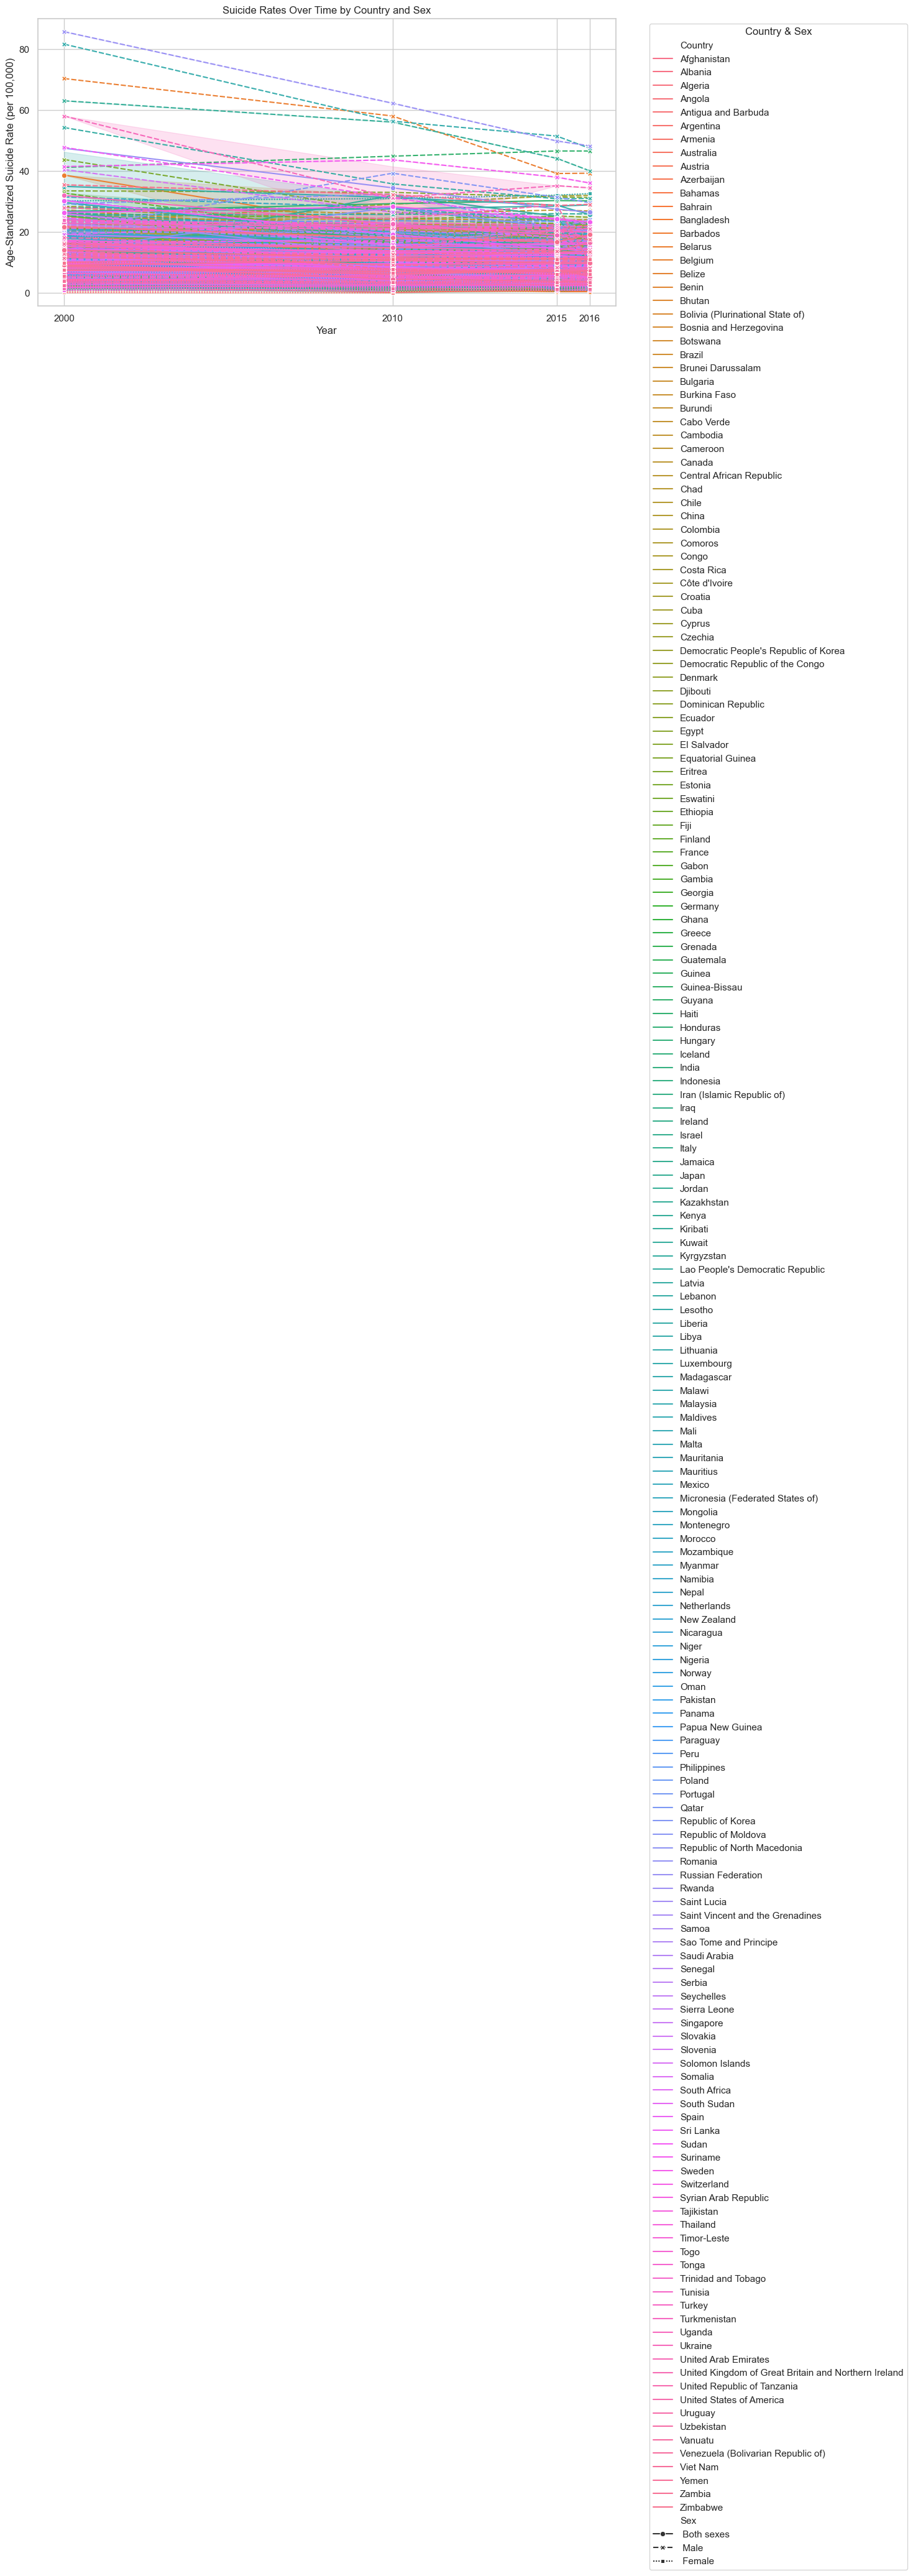

In [15]:
# Line plot: Trends over time for selected countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Year", y="Suicide Rate", hue="Country", style="Sex", markers=True)
plt.title("Suicide Rates Over Time by Country and Sex")
plt.xlabel("Year")
plt.ylabel("Age-Standardized Suicide Rate (per 100,000)")
plt.legend(title="Country & Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(df_long["Year"].unique())
plt.show()

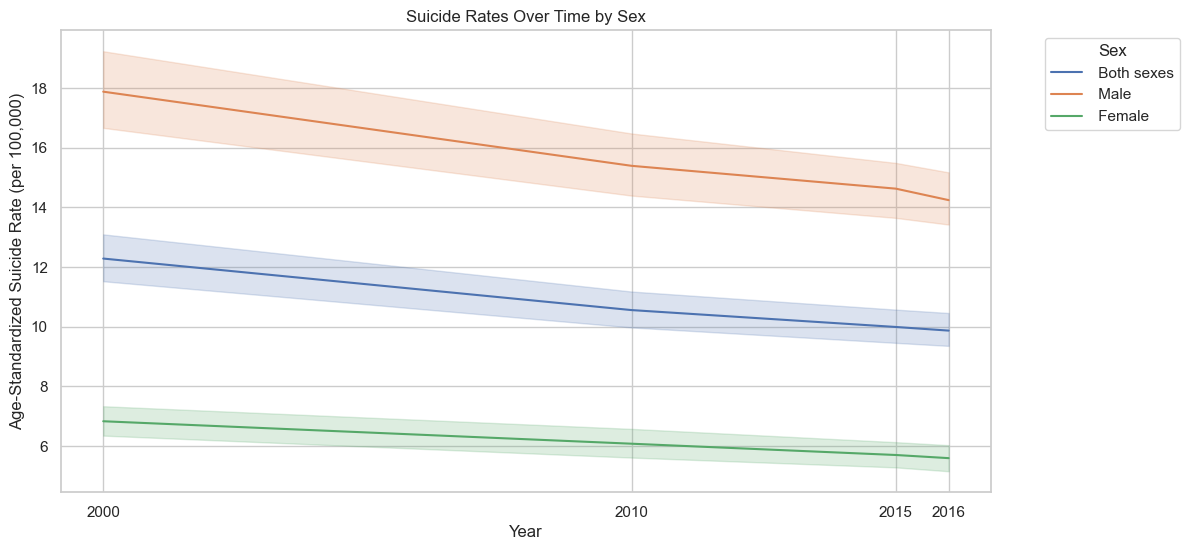

In [19]:
# Line plot: Trends over time by sex
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Year", y="Suicide Rate", hue="Sex", markers=True)
plt.title("Suicide Rates Over Time by Sex")
plt.xlabel("Year")
plt.ylabel("Age-Standardized Suicide Rate (per 100,000)")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(df_long["Year"].unique())
plt.show()

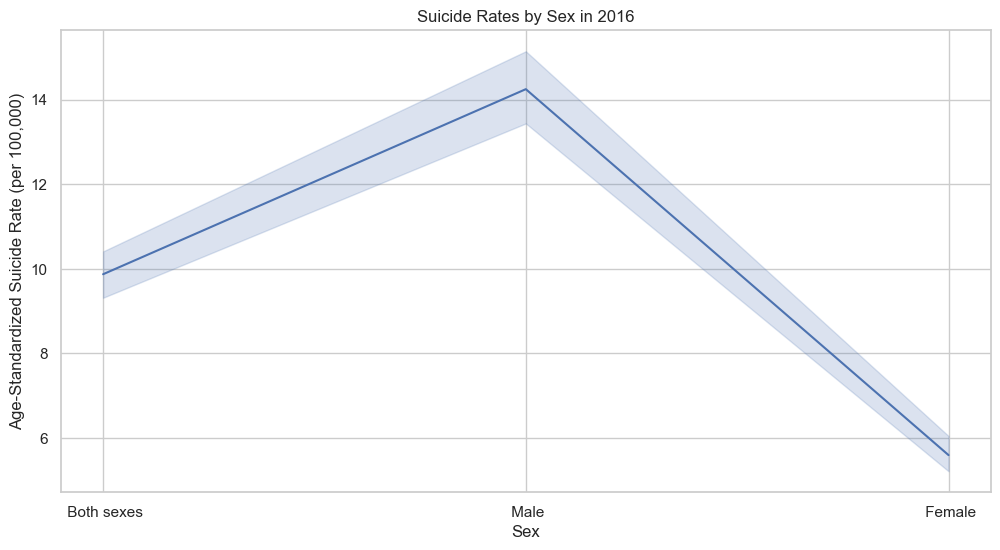

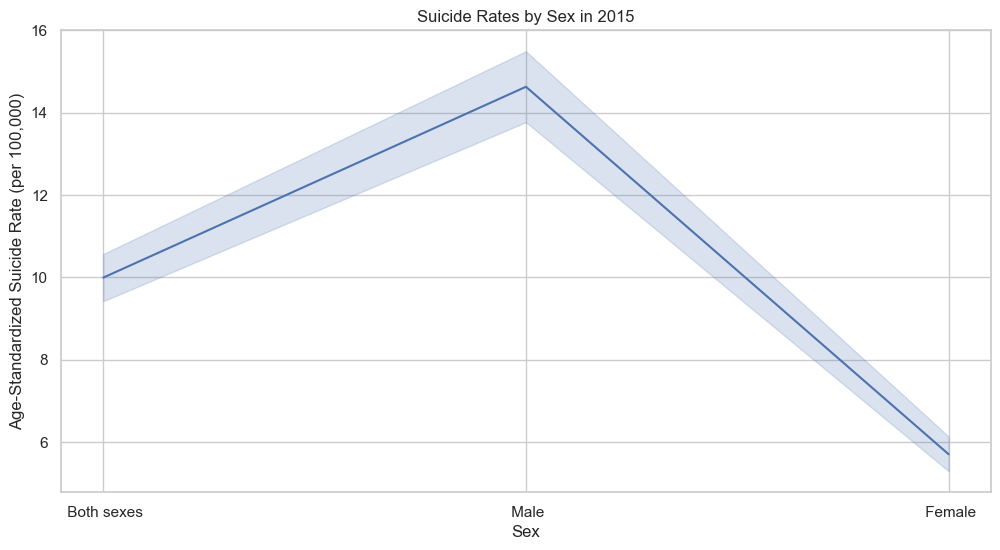

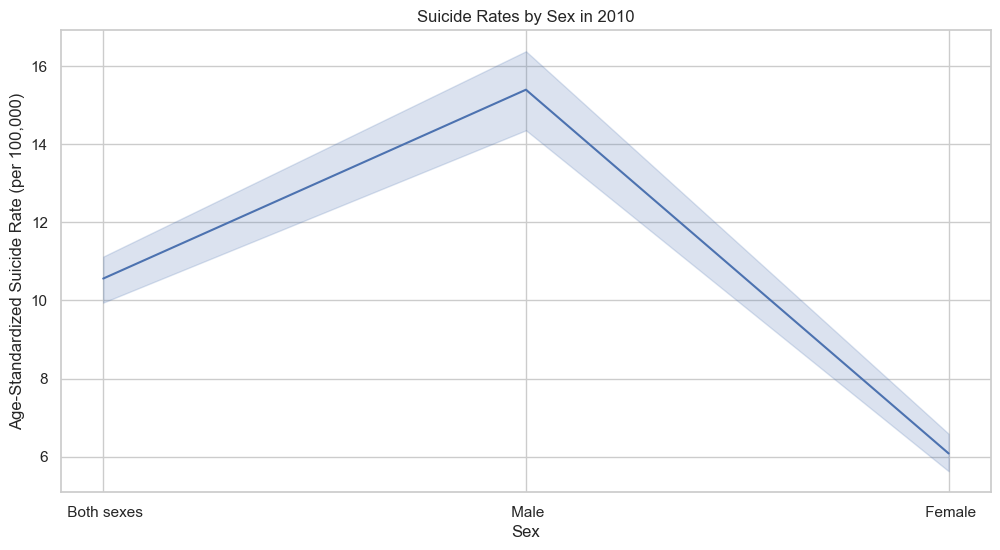

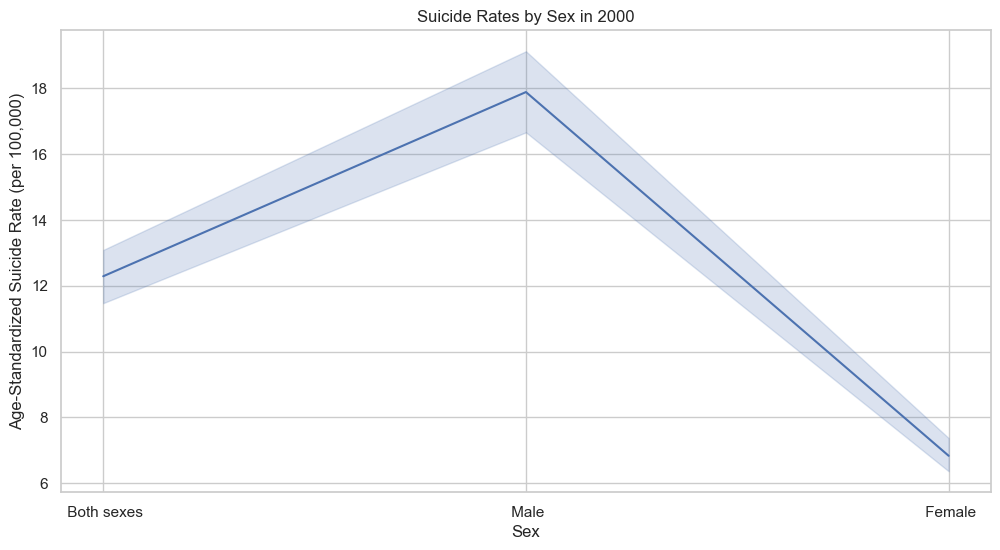

In [21]:
# Define years of interest
years_of_interest = [2016, 2015, 2010, 2000]

# Create line plots for each year
for year in years_of_interest:
    df_year = df_long[df_long["Year"] == year]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_year, x="Sex", y="Suicide Rate", markers=True)
    plt.title(f"Suicide Rates by Sex in {year}")
    plt.xlabel("Sex")
    plt.ylabel("Age-Standardized Suicide Rate (per 100,000)")
    plt.show()

In [22]:
# Check if the dataset contains age-related information
if 'Age' in df.columns:
    # Set style
    sns.set(style="whitegrid")
    
    # Create a plot for Age and Sex
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x="Sex", y="Age")
    plt.title("Distribution of Age by Sex")
    plt.xlabel("Sex")
    plt.ylabel("Age")
    plt.show()
else:
    print("The dataset does not contain an 'Age' column.")

The dataset does not contain an 'Age' column.


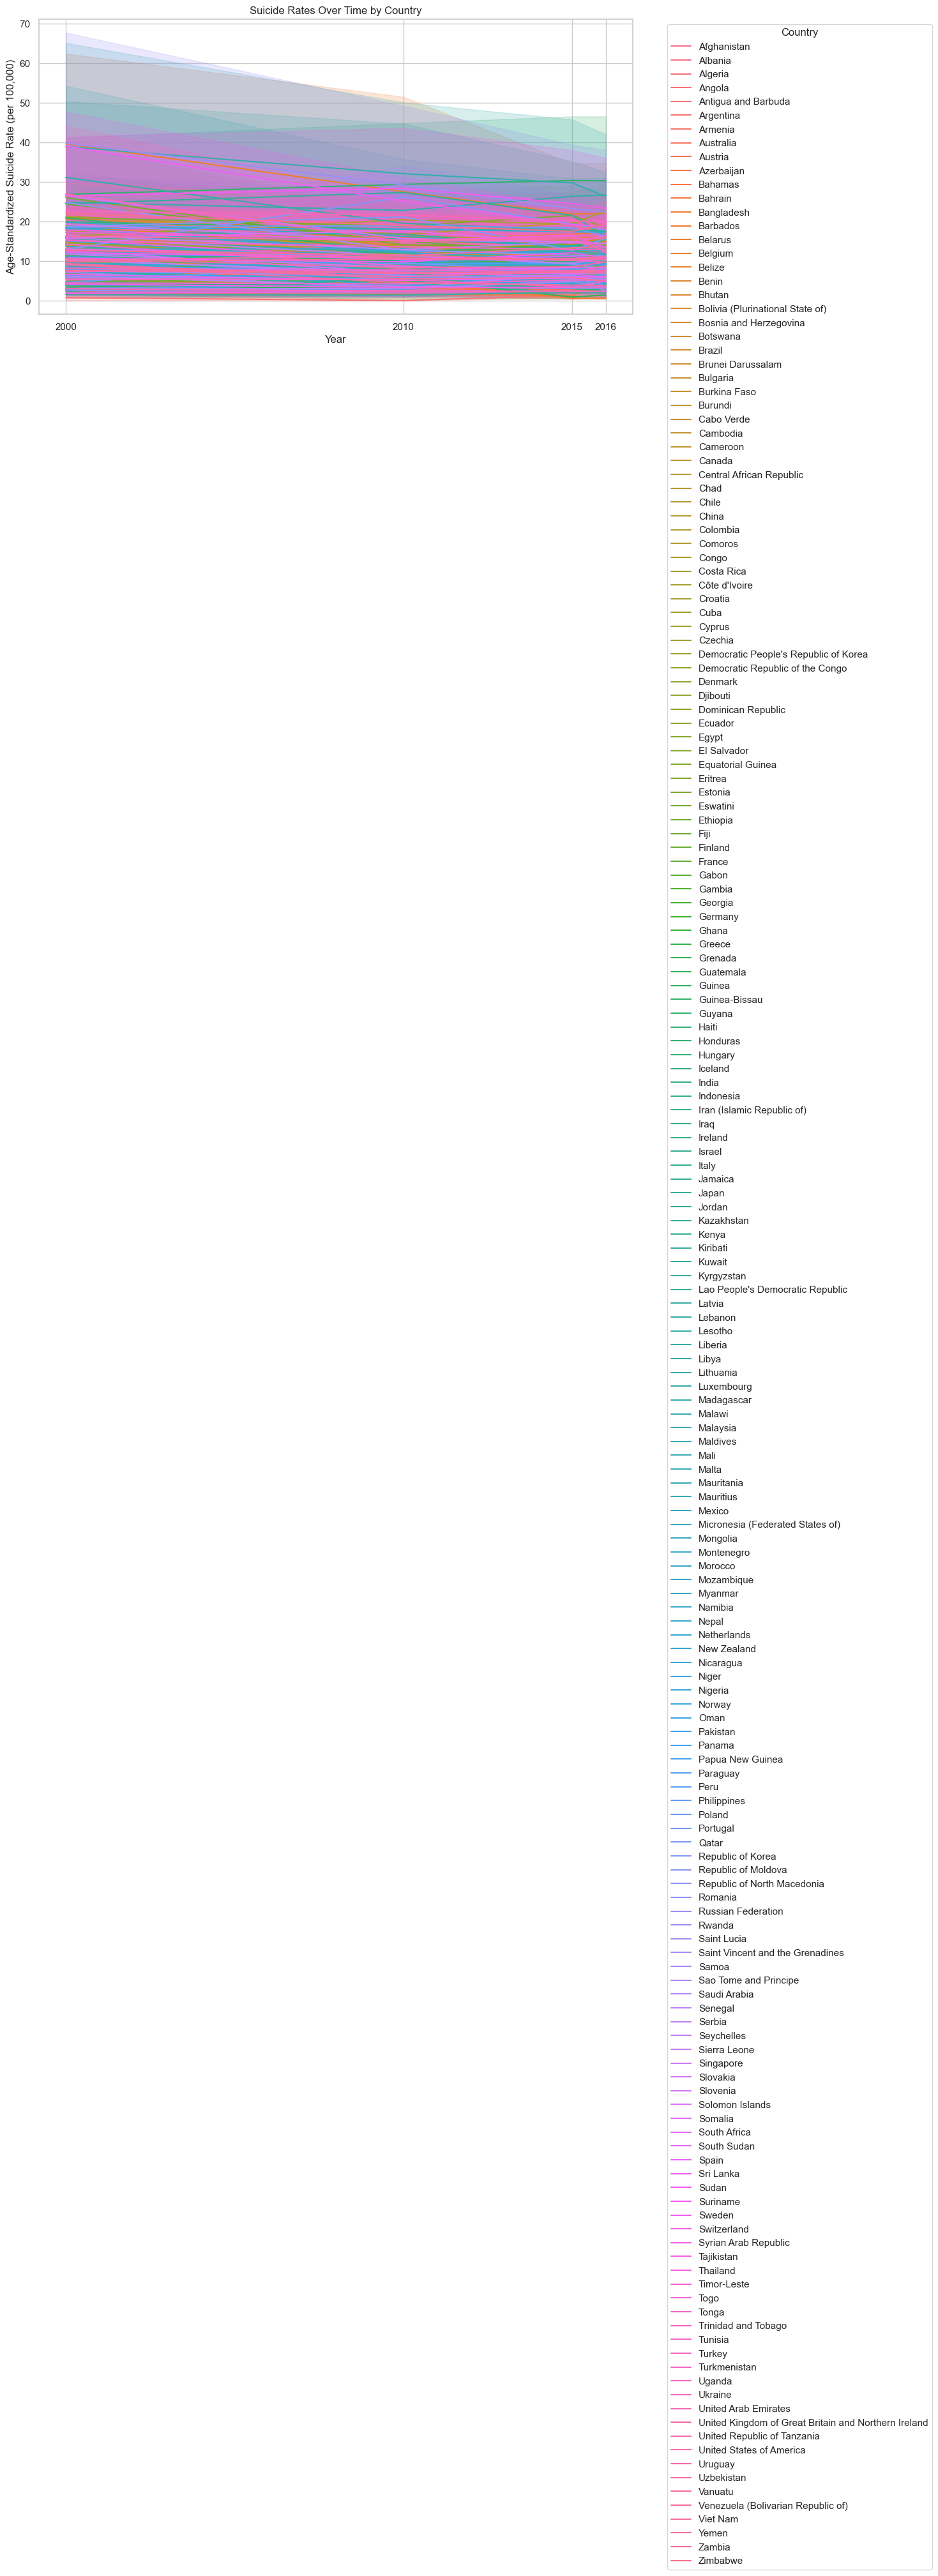

In [23]:
# Remove the Sex column and keep unique countries with their suicide rates each year
df_filtered = df.drop(columns=["Sex"]).drop_duplicates()

# Convert the data from wide to long format
df_long = df_filtered.melt(id_vars=["Country"], var_name="Year", value_name="Suicide Rate")
df_long["Year"] = df_long["Year"].astype(int)

# Line plot: Suicide rates over time for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_long, x="Year", y="Suicide Rate", hue="Country")
plt.title("Suicide Rates Over Time by Country")
plt.xlabel("Year")
plt.ylabel("Age-Standardized Suicide Rate (per 100,000)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(df_long["Year"].unique())
plt.show()
